К полученным данным идентифицировать и оценить две различных, но обоснованно возможных ARMA модели. Выбрать из них наиболее адекватную (выбор Объяснить).

Провести анализ остатков от удаления модели:тип вероятностного распределения,автокоррелированность остатков.

Построить непараметрическую оценку спектральной плотности к начальным данным и к остаткам после удаления модели.

Построить прогноз и доверительный интервал для прогноза уровня 0.95 на 1 период сезонности( если она есть) или 5 интервалов времени вперед( если сезонность не выявлена).

При явной нестационарности ряда (обосновать) предварительно провести переход к преобразованным данным.

Построить прогноз по модели (сезонной, если она есть) Holta-Winters на 12 интервалов времени вперед.

In [90]:
import <- read.csv('/content/var11.csv',header=TRUE,sep=';')

In [91]:
head(import)

,DATE,NUM
,<chr>,<int>
1,01.06.2013,218314
2,01.07.2013,233174
3,01.08.2013,233562
4,01.09.2013,235142
5,01.10.2013,240567
6,01.11.2013,237565


In [92]:
importFact <- ts(import$NUM,start= c(2013,6),frequency =12)
importFact

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,,,,,,218314,233174,233562,235142,240567,237565,245904
2014,250390,227950,257189,255791,267997,262251,274231,276865,272586,287206,279723,296466
2015,290866,265709,297067,289729,293684,280711,292781,291680,284311,291381,279963,287512
2016,285235,262754,282106,266194,273850,260264,268502,269362,256292,272892,267074,273271
2017,275098,254629,284082,273031,284746,273298,286633,286742,285479,299704,302542,309464
2018,310009,287337,324443,314976,323463,319195,337791,353129,343278,356746,356560,370252
2019,368016,326243,369238,364337,376745,366482,368787,386854,377521,396941,389989,402391
2020,398354,372490,396652,357317,301133,313394,341113,327939,327785,324127,335884,346317
2021,345258,277646,351885,339540,353082,340978,353165,349566,327643,358477,353458,362022
2022,355873,315221,365987,353095,363766,354009,366863,371542,369756,383704,371281,376280


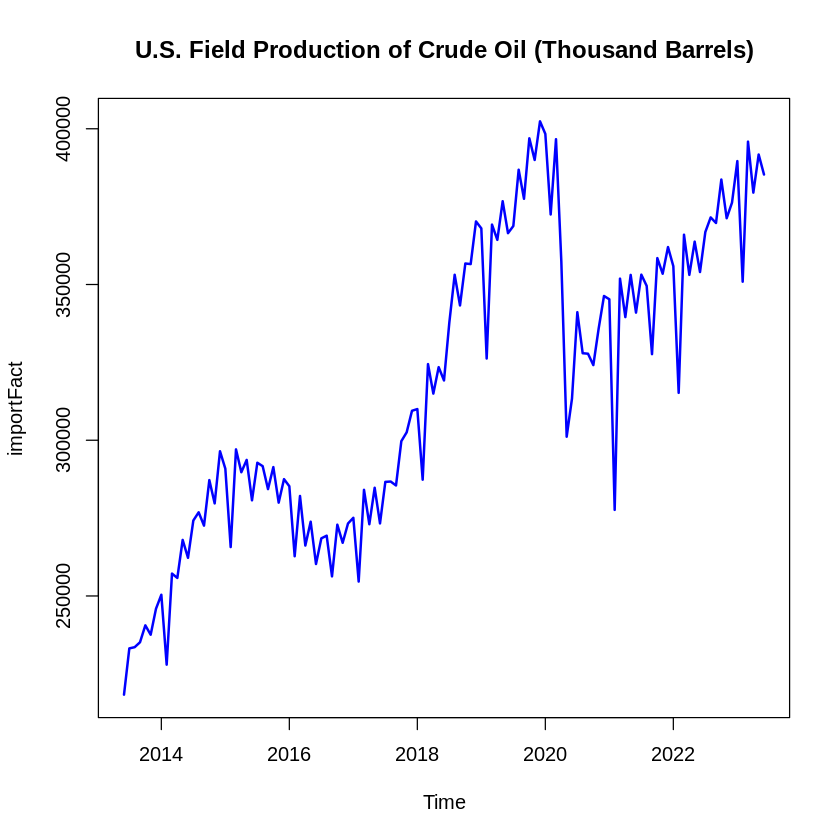

In [93]:
plot(importFact,type = "l", col = "blue",lwd = 2,main = "U.S. Field Production of Crude Oil (Thousand Barrels)")

Нестационарность явно присутствует в ряде. Возьмем обычную разность

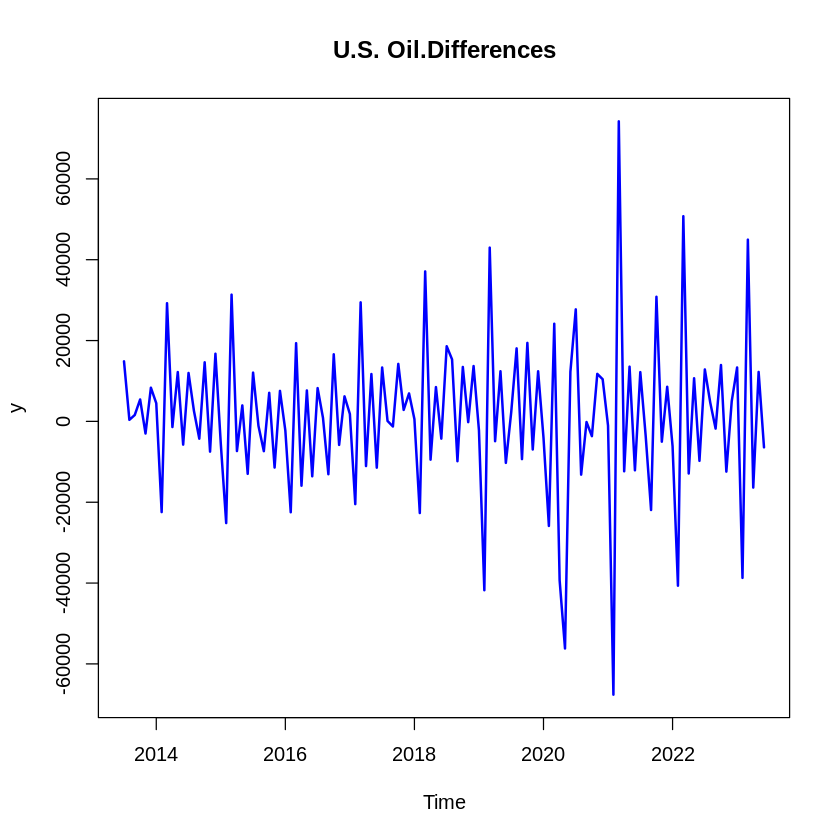

In [94]:
y <- diff(importFact)
plot(y ,type = "l", col = "blue",lwd = 2,main = "U.S. Oil.Differences")

Заметна нестационарность в сезонности с периодом 12. Возьмем сезонную разность

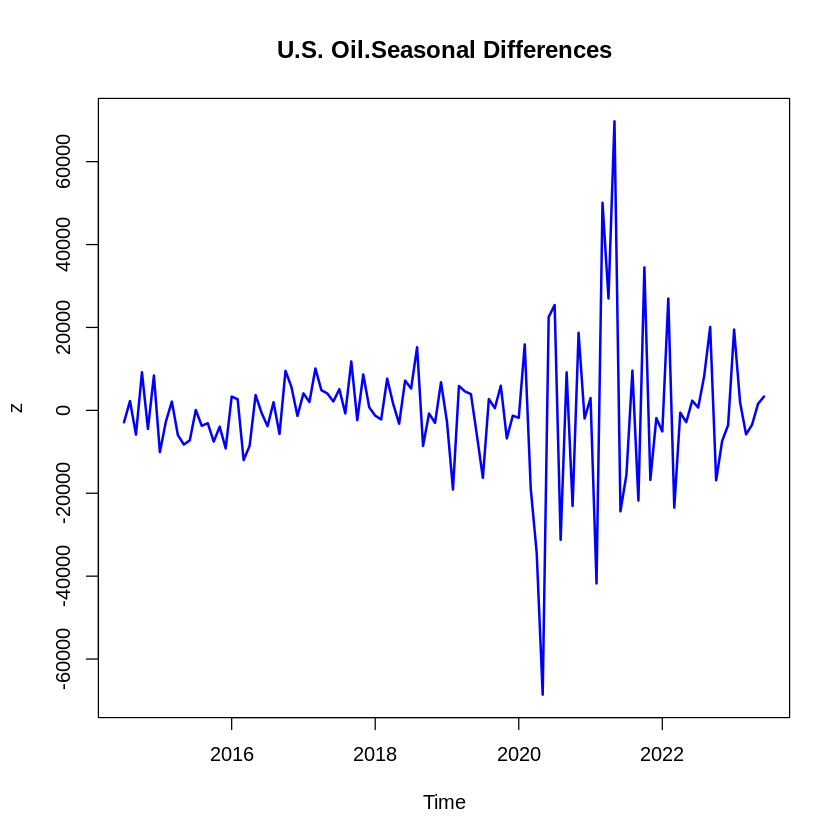

In [95]:
z <- diff(y,lag = 12)
plot(z ,type = "l", col = "blue",lwd = 2,main = "U.S. Oil.Seasonal Differences")

Оценим ACF,PACF

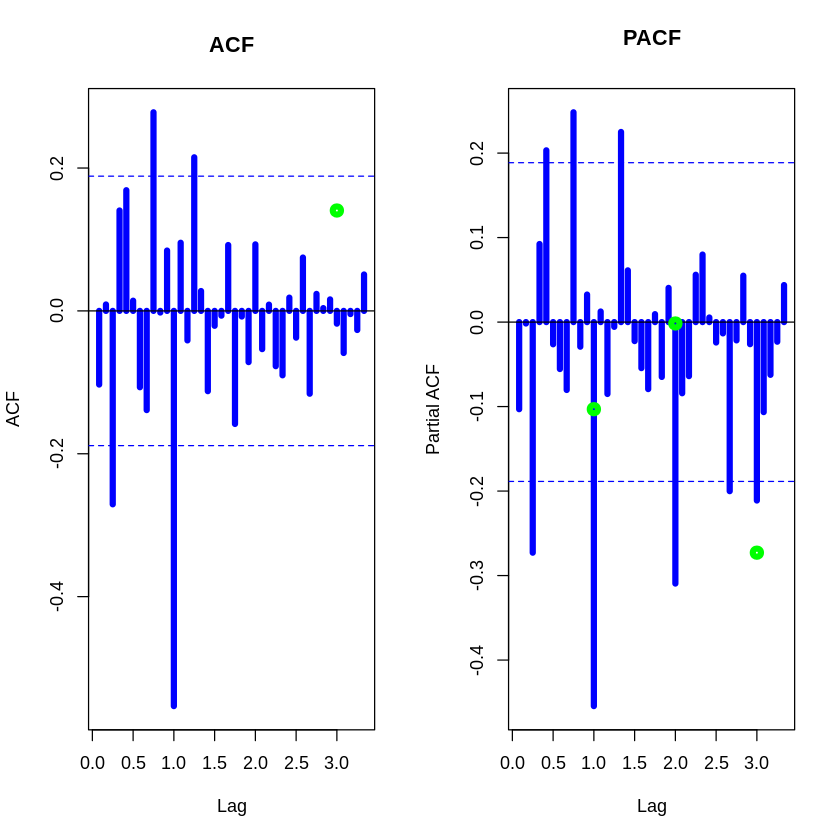

In [96]:
par(mfrow = c(1, 2), cex = 0.9)
zacf = acf(z, lwd = 5,main = "ACF",col = "blue",lag.max=40)
points(3,zacf$acf[4],col = "green",lwd = 5)
points(12,zacf$acf[13],col = "red",lwd = 5)
zpacf= pacf(z,lwd = 5,main = "PACF",col = "blue",lag.max=40)
points(1:4,zpacf$acf[1:4],col = "green",lwd = 5)
points(12,zpacf$acf[12],col = "red",lwd = 5)

Из графиков можно сделать вывод о наиболее подходящих параметрах SARMA-модели:

Период сезонности, очевидно, 12.

Порядок сезонной авторегрессии 1.

Порядок сезонного скользящего среднего 1.

Порядок несезонной авторегрессии 5.

Порядок несезонного скользящего среднего 0.

Порядок сезонной разности - 0 или 1.

In [97]:
modelimport <- arima(z,order = c(5,0,0),seasonal = list(order= c(1,0,1),period = 12 ),method = "ML")
modelimport2 <- arima(z,order = c(5,1,0),seasonal = list(order= c(1,1,1),period = 12 ),method = "ML")

Считается, что наилучшей будет модель с наименьшим значением критерия AIC. Сравним значения критерия для двух моделей, которые мы оценили выше.

In [98]:
  modelimport$aic

[1] 2350.622

In [99]:
  modelimport2$aic

[1] 2140.256

Лучшей будет модель (5,1,0)(1,1,1)

Остатки после исключения модели и усредненная сумма квадратов остатков

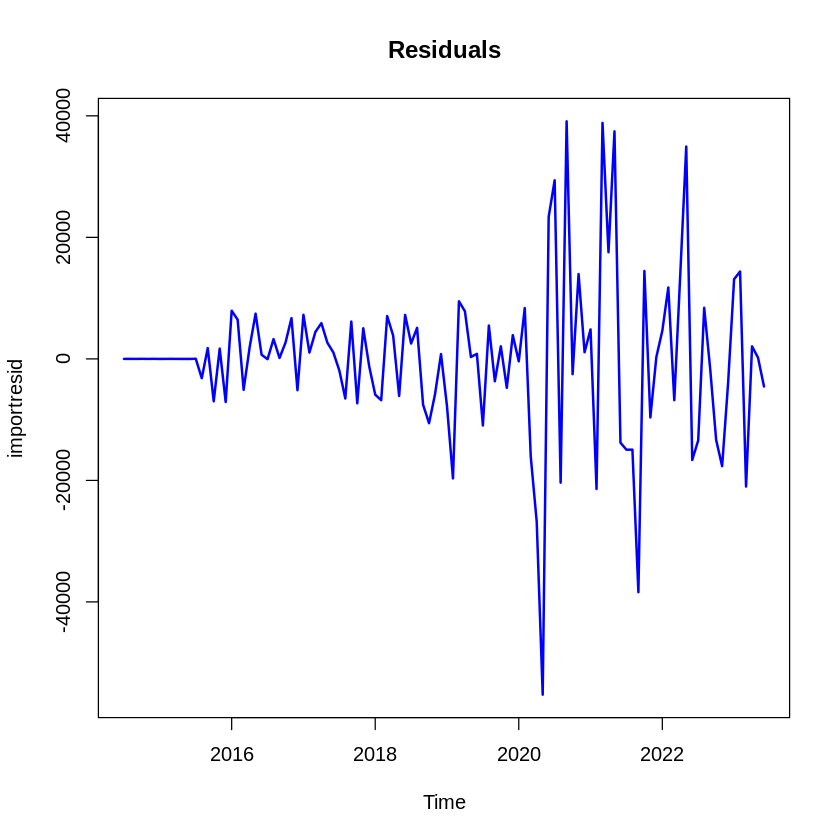

In [100]:
importresid <- modelimport2$residuals
plot(importresid ,type = "l", col = "blue",lwd = 2,main = "Residuals")

проведем тест Льюнг-Бокса остатков и постром qq-график

In [101]:
Box.test(importresid, lag = 16, type = "Ljung-Box", fitdf = 2)


	Box-Ljung test

data:  importresid
X-squared = 21.004, df = 14, p-value = 0.1015


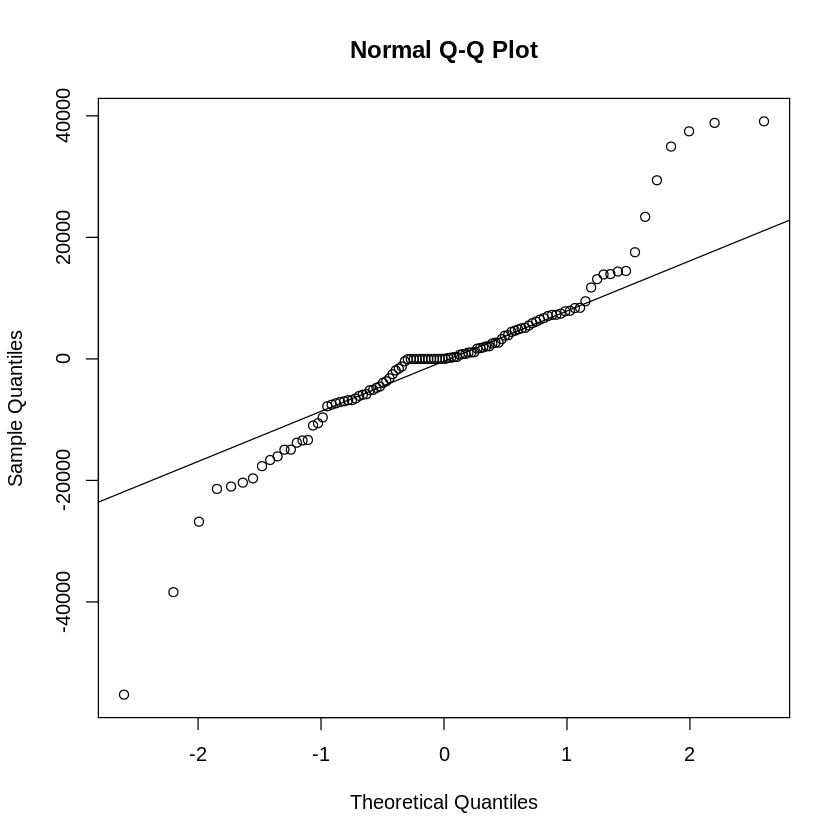

In [102]:
 qqnorm(importresid)
  qqline(importresid)

Посмотрим на сглаженную спектральную плотность исходного ряда

Для сравнения добавим спектральную плотность остатков

In [103]:
install.packages('TSA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [104]:
library(TSA)

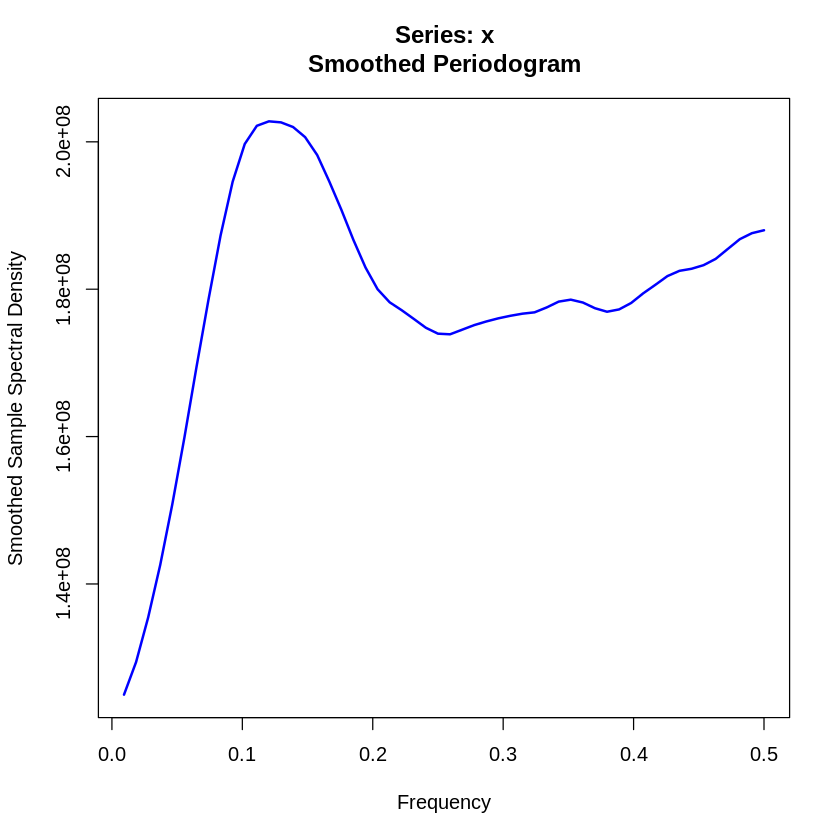

In [105]:
k3<- kernel('daniell',c(5,5,5))

sp=spec(importresid,kernel=k3,log='no',sub='',xlab='Frequency',
ylab='Smoothed Sample Spectral Density',col = "blue",lwd = 2)

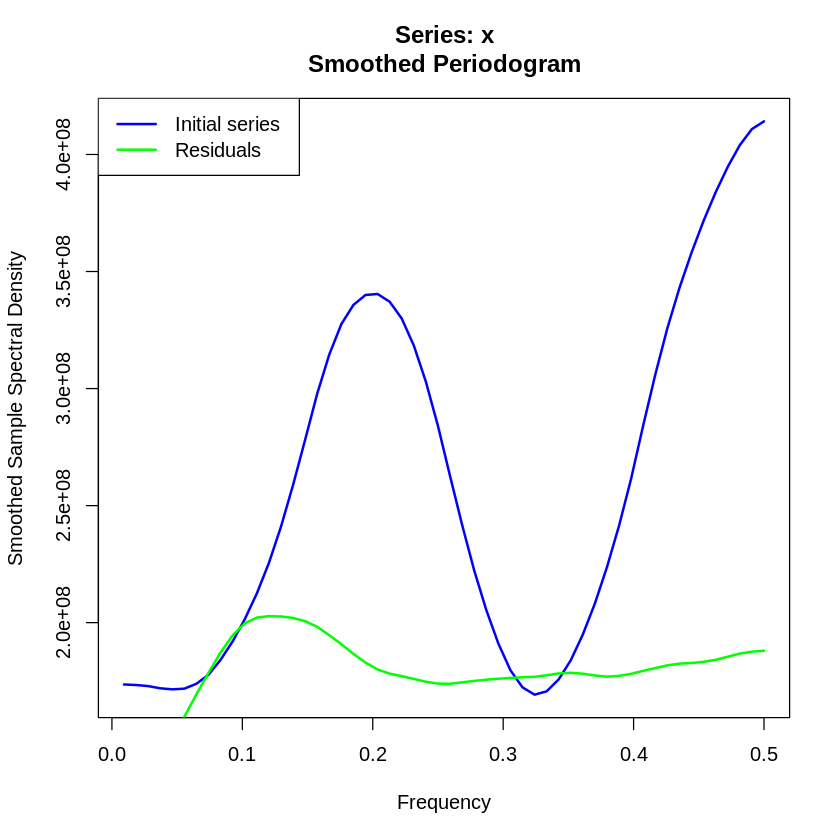

In [106]:
spz=spec(z,kernel=k3,log='no',sub='',xlab='Frequency',
ylab='Smoothed Sample Spectral Density',col = "blue",lwd = 2)

lines(sp$freq,sp$spec,col='green',lwd=2)
legend("topleft",c("Initial series","Residuals"),lwd = 2,col=c("blue","green"))

Выдача на один график обеих спектральных плотностей показывает, что модель действительно хорошая. Остатки ближе к белому шуму. Модель учла все основные закономерности в исходных данных

Построим прогноз на 12 месяцев вперед. Добавим к нему прошлые значения и доверительные интервалы уровня 0.95

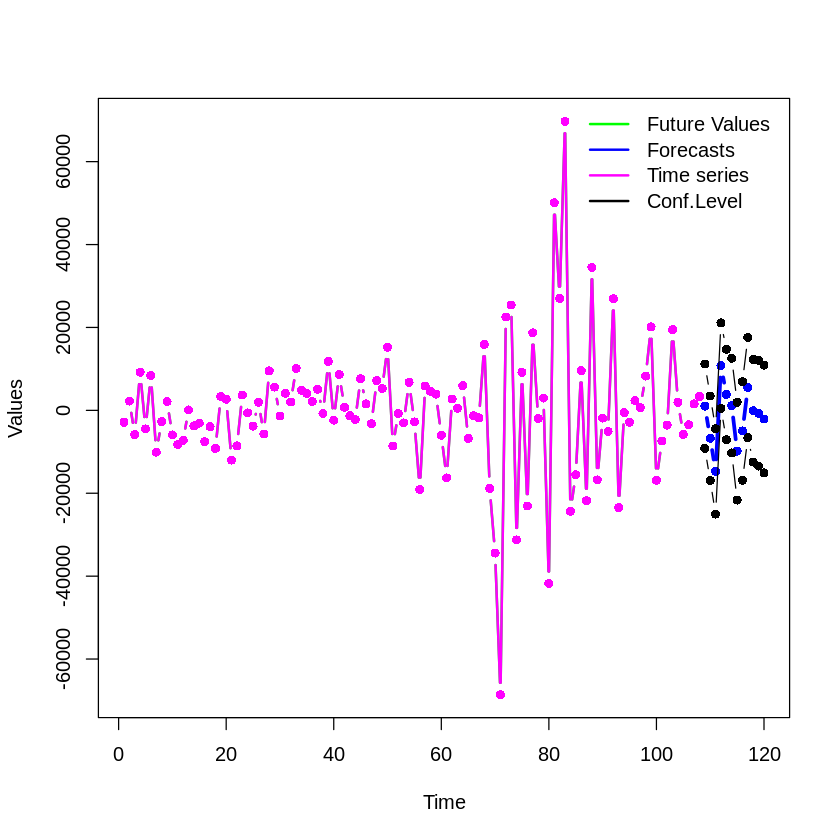

In [107]:
getVector <- function(vv,bInd,l)
{
  c <- vector()
  if (bInd > 1)
  {
    c <- rep(NA,bInd-1)
  }
  res <- c(c,vv)
  cc <- vector()
  cc <- rep(NA,l-length(res))
  res <- c(res,cc)
  return(res)

}
lzz <- length(z)
nforec <- 12
ll <- lzz+nforec
forecImport<-predict(modelimport2,n.ahead = nforec)
vec1 <- getVector(z,1,ll)
vec2 <- getVector(forecImport$pred,lzz+1,ll)
vec3 <- getVector(z,1,ll)
q<- qnorm(0.75,0,1)
dPl <- forecImport$pred + forecImport$se*q
dMn <- forecImport$pred - forecImport$se*q
vec4 <- getVector(dPl,lzz+1,ll)
vec5 <- getVector(dMn,lzz+1,ll)
res <- cbind(vec1,vec2,vec3,vec4,vec5)
matplot(res ,  type = c("b","b","b","b","b"),pch = 16,lty=1, lwd= c(2,3,2,1,1),ylab = "Values",xlab="Time",col = c("green","blue","magenta","black","black"))
abline(h=coef(modelimport2)[names(coef(modelimport2))=='intercept'])
      legend("topright",c("Future Values","Forecasts","Time series","Conf.Level"),bty="n",lwd = 2,col = c("green","blue","magenta","black"))

Мы получили прогноз на два года ряда из разностей. Вернемся к исходным значениям взяв обратный к сезонным разностям оператор diffinv. В качестве начальных условий возьмем первые 12 значений из ряда

Проинтегрируем также доверительные интервалы и такими же начальными условиями.

In [108]:
firsty <- y[1:12]
iiy <- c(z,forecImport$pred)
iPl <- c(z,dPl)
iMn <- c(z,dMn)
iforec <-  diffinv(iiy,lag= 12,differences = 1,firsty)
iforecPl <-  diffinv(iPl,lag= 12,differences = 1,firsty)
iforecMn <-  diffinv(iMn,lag= 12,differences = 1,firsty)

Теперь проинтегрируем уже несезонные разности с начальным значением равным первому значению ряда импорта.

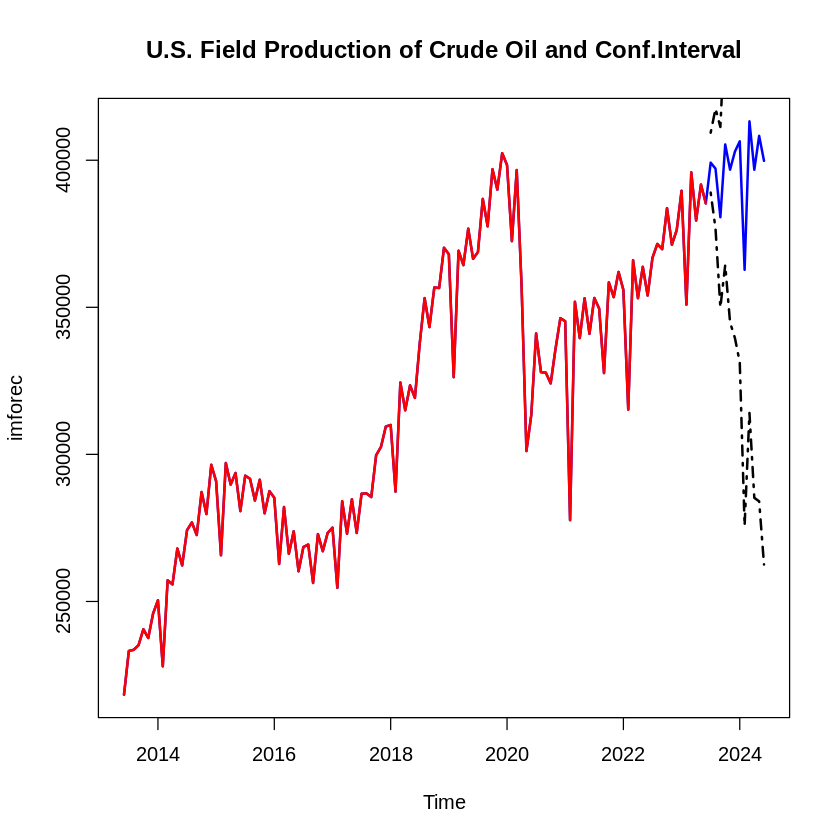

In [112]:
firstImport <-importFact[1]
  imforec <- diffinv(iforec,lag= 1,differences = 1,firstImport)
  imforecPl <- diffinv(iforecPl,lag= 1,differences = 1,firstImport)
  imforecMn <- diffinv(iforecMn,lag= 1,differences = 1,firstImport)
  imforec <- ts(imforec,start = c(2013,6),frequency = 12)
  imforecPl <- ts(imforecPl,start = c(2013,6),frequency = 12)
  imforecMn <- ts(imforecMn,start = c(2013,6),frequency = 12)
  imforecPl[1:length(importFact)]= NA
  imforecMn[1:length(importFact)]= NA


  plot(imforec,col = "blue",lwd = 2,type = "l", main = "U.S. Field Production of Crude Oil and Conf.Interval" )
  lines(importFact,lwd = 2,col = "red")
  lines(imforecPl,lwd = 2,lty = 4,col = "black")
  lines(imforecMn,lwd = 2,lty = 4,col = "black")

Построим прогноз по модели Holta-Winters на 12 месяцев вперед.

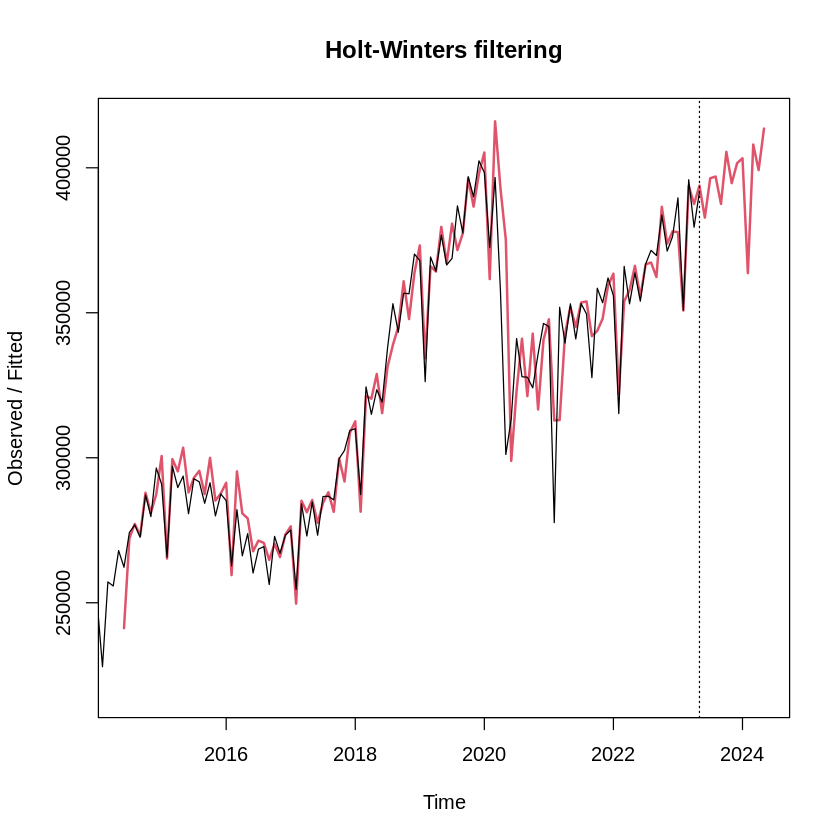

In [110]:
past <- window(importFact,end = c(2023,5))
future <- window(importFact,start = c(2023,6))
model <- HoltWinters(past,seasonal = "mult")
pred <- predict(model,n.ahead =12)
plot(model,predicted.values = pred,lwd=2)
lines(future,col = "blue",lwd = 3)